<a href="https://colab.research.google.com/github/cyberdreams8/Face-Mask-Detection/blob/main/Face_Mask_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing dataset

In [ ]:
# API to fetch dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
!ls

data		       kaggle.json  test1.jpg  test4.jpg  zeke.jpg
face-mask-dataset.zip  sample_data  test2.jpg  test.jpg


Importing the dependencies

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split



In [ ]:
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[0:5])
print(with_mask[-5:])


['with_mask_2074.jpg', 'with_mask_1479.jpg', 'with_mask_648.jpg', 'with_mask_3691.jpg', 'with_mask_2448.jpg']
['with_mask_3234.jpg', 'with_mask_2396.jpg', 'with_mask_3484.jpg', 'with_mask_3574.jpg', 'with_mask_1564.jpg']


In [ ]:
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_774.jpg', 'without_mask_1611.jpg', 'without_mask_733.jpg', 'without_mask_178.jpg', 'without_mask_293.jpg']
['without_mask_3493.jpg', 'without_mask_711.jpg', 'without_mask_514.jpg', 'without_mask_3279.jpg', 'without_mask_3776.jpg']


In [ ]:
print('number of with mask images',len(with_mask))
print('number of without mask images',len(without_mask))

number of with mask images 3725
number of without mask images 3828


Creating label for the classes of images

with mask -->1
without mask-->0

In [ ]:
# create the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

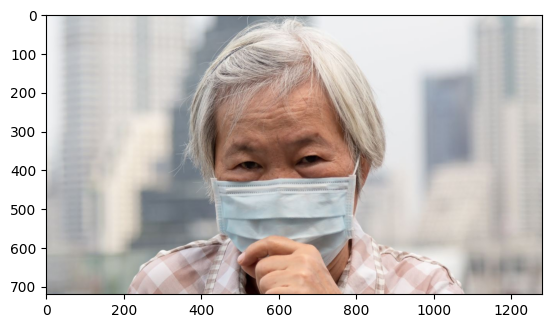

In [ ]:
# Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3484.jpg')
imgplot = plt.imshow(img)
plt.show()

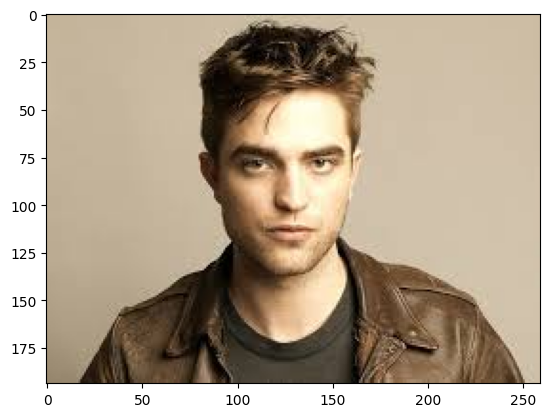

In [ ]:
# Displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3493.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

resize the images
convert images to numpy arrays

In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
# without_mask_path = '/content/data/without_mask/'

data = []
for img_file in with_mask:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[168, 145, 101],
        [167, 144,  99],
        [167, 144,  97],
        ...,
        [178, 150, 102],
        [177, 149, 101],
        [177, 149, 101]],

       [[168, 145, 101],
        [167, 145, 100],
        [167, 144,  98],
        ...,
        [178, 150, 102],
        [177, 149, 101],
        [177, 149, 101]],

       [[169, 146, 102],
        [168, 145, 100],
        [168, 145,  98],
        ...,
        [178, 150, 102],
        [177, 149, 101],
        [177, 149, 101]],

       ...,

       [[144, 122,  85],
        [146, 124,  86],
        [147, 125,  86],
        ...,
        [163, 151, 143],
        [167, 157, 149],
        [175, 164, 156]],

       [[142, 120,  83],
        [144, 122,  84],
        [146, 124,  85],
        ...,
        [109, 100,  96],
        [127, 118, 115],
        [140, 131, 127]],

       [[141, 119,  82],
        [143, 121,  83],
        [145, 123,  84],
        ...,
        [ 40,  31,  30],
        [ 44,  35,  36],
        [ 53,  44,  45]]], dtype=uint8)
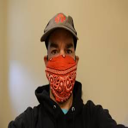

In [ ]:
data[3]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting the image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.99607843, 0.98823529, 0.99215686],
        [0.99215686, 0.98431373, 0.98823529],
        [0.99607843, 0.98823529, 0.99215686],
        ...,
        [0.99215686, 0.98431373, 0.98823529],
        [0.99215686, 0.98431373, 0.98823529],
        [0.99215686, 0.98431373, 0.98823529]],

       [[0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686],
        ...,
        [0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686]],

       [[0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686],
        ...,
        [0.99215686, 0.98431373, 0.98823529],
        [0.99607843, 0.98823529, 0.99215686],
        [0.99607843, 0.98823529, 0.99215686]],

       ...,

       [[0.59215686, 0.76470588, 0.89803922],
        [0.55686275, 0.74117647, 0.87058824],
        [0.54901961, 0

**Building a CNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - acc: 0.6485 - loss: 0.8418 - val_acc: 0.8860 - val_loss: 0.2818
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8711 - loss: 0.3220 - val_acc: 0.8926 - val_loss: 0.2692
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9034 - loss: 0.2539 - val_acc: 0.8959 - val_loss: 0.2557
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9190 - loss: 0.2131 - val_acc: 0.9041 - val_loss: 0.2439
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9377 - loss: 0.1685 - val_acc: 0.9025 - val_loss: 0.2556


Model Evaluation

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9161 - loss: 0.2330
Test Accuracy = 0.9179351329803467


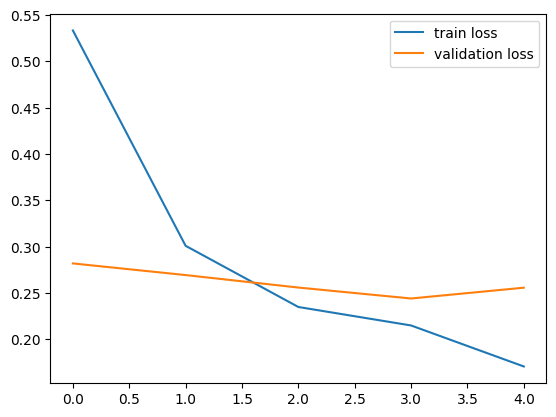

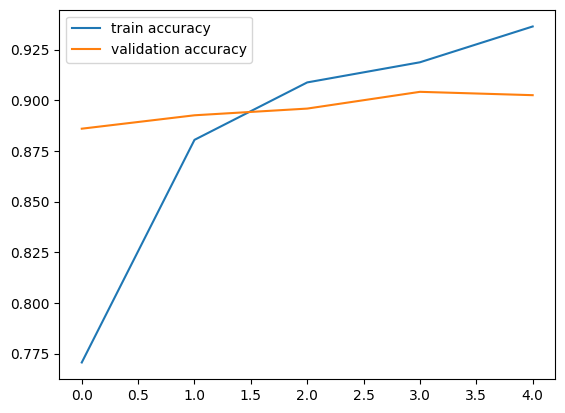

In [ ]:
h = history

# plot the lost value

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Enter the path of the image to predict: /content/test.jpg


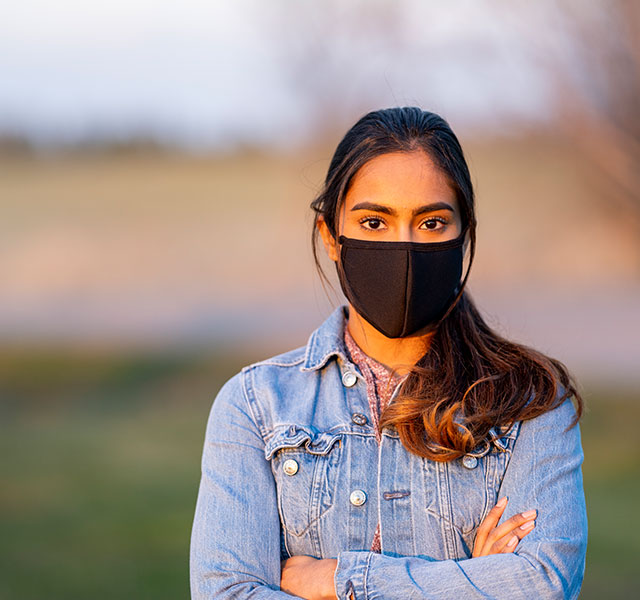

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
[[0.22767767 0.8757181 ]]
1
The person in the image is with mask


In [ ]:
input_image_path = input('Enter the path of the image to predict: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is without mask')
else:
  print('The person in the image is with mask')

Enter the path of the image to predict: /content/test2.jpg


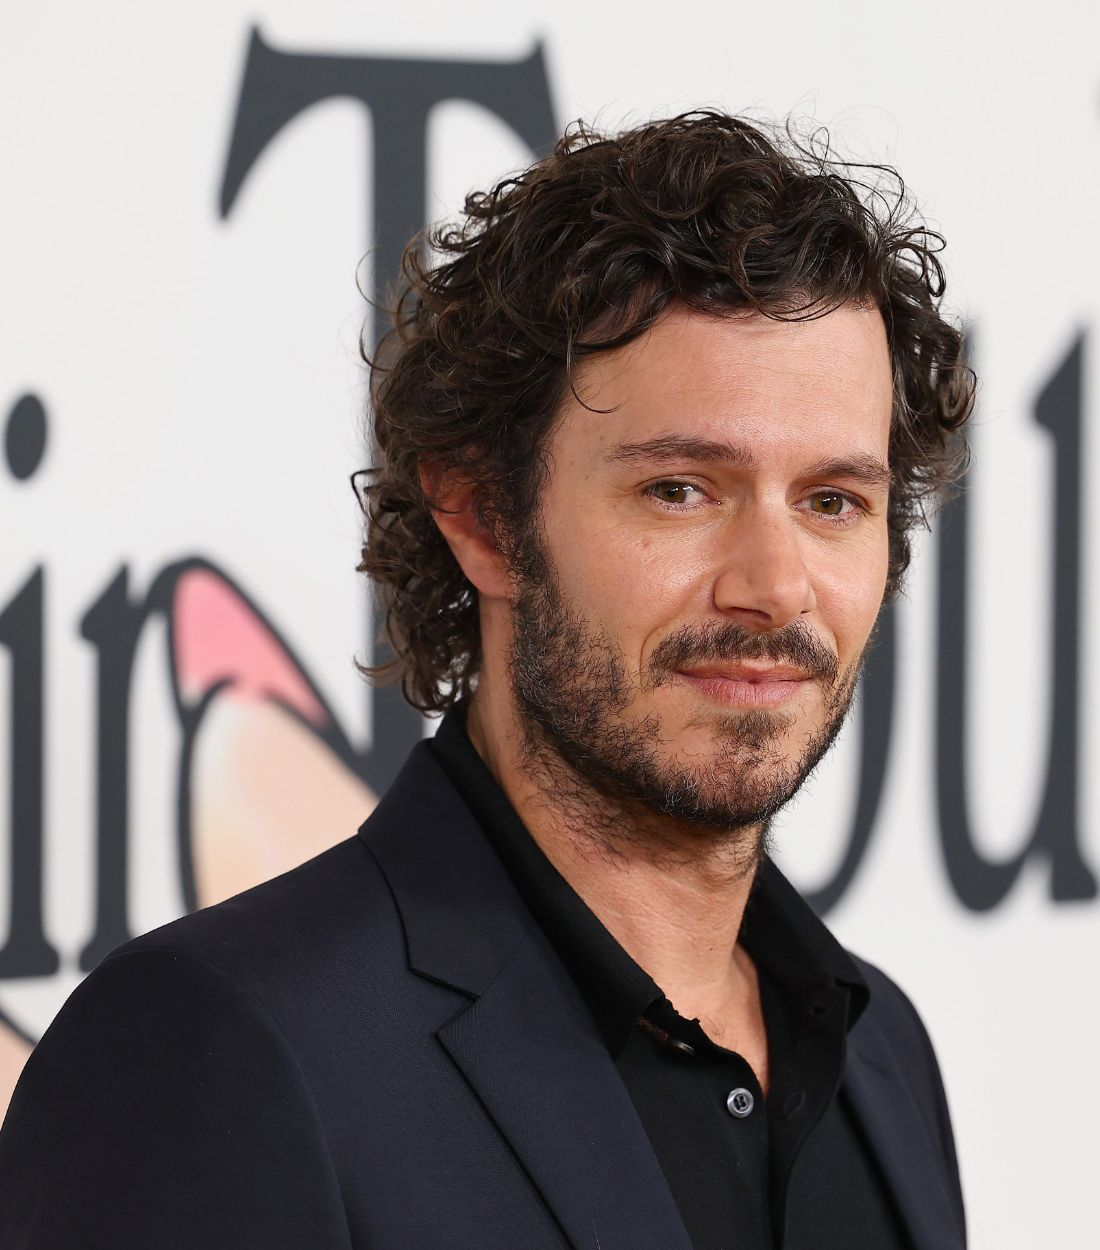

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0.12791495 0.9613665 ]]
1
The person in the image is without mask


In [ ]:
input_image_path = input('Enter the path of the image to predict: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is without mask')
else:
  print('The person in the image is with mask')